## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [2]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1)  # shape (N,1)
    # 生成多项式特征：x^1, x^2, ..., x^feature_num
    poly_feats = [x ** i for i in range(1, feature_num + 1)]
    ret = np.concatenate(poly_feats, axis=1)
    return ret

def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    centers = np.linspace(0, 25, feature_num)
    if feature_num > 1:
        sigma = centers[1] - centers[0]
    else:
        sigma = 1.0
    x = np.expand_dims(x, axis=1)  # shape (N,1)
    # 计算高斯基：exp(-(x - c_j)^2 / (2*sigma^2))
    gauss_feats = [np.exp(-((x - c) ** 2) / (2 * sigma ** 2)) for c in centers]
    ret = np.concatenate(gauss_feats, axis=1)
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [24]:
def main(x_train, y_train, basis_func=identity_basis, use_gradient=False):
    """
    训练模型，并返回一个函数f(x)，使得 y = f(x)
    参数:
      x_train, y_train: 训练数据
      basis_func: 基函数，identity_basis / multinomial_basis / gaussian_basis
      use_gradient: 是否使用梯度下降优化（否则使用最小二乘）
    """
    # 构造设计矩阵phi
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)  # shape (N, M+1)

    w_ls = np.linalg.pinv(phi) @ y_train  # shape (M+1,)

    w_gd = np.zeros(phi.shape[1])
    lr = 1e-4
    max_iter = 100000
    N = len(y_train)
    prev_loss = np.inf
    phi_norm = phi.copy()
    feat_max = np.max(np.abs(phi_norm[:, 1:]), axis=0)
    phi_norm[:, 1:] /= (feat_max + 1e-8)

    for i in range(max_iter):
        y_pred = phi_norm @ w_gd
        diff = y_pred - y_train
        loss = np.mean(diff ** 2)
        if np.isnan(loss):
            lr *= 0.1
            continue
        if loss > prev_loss:
            lr *= 0.5
        prev_loss = loss
        grad = (2.0 / N) * (phi_norm.T @ diff)
        w_gd -= lr * grad
        if np.linalg.norm(grad) < 1e-6:
            break
    w_gd[1:] /= (feat_max + 1e-8)


    w = w_gd if use_gradient else w_ls

    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        return phi @ w

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
训练集预测值与真实值的标准差：0.4
预测值与真实值的标准差：0.4


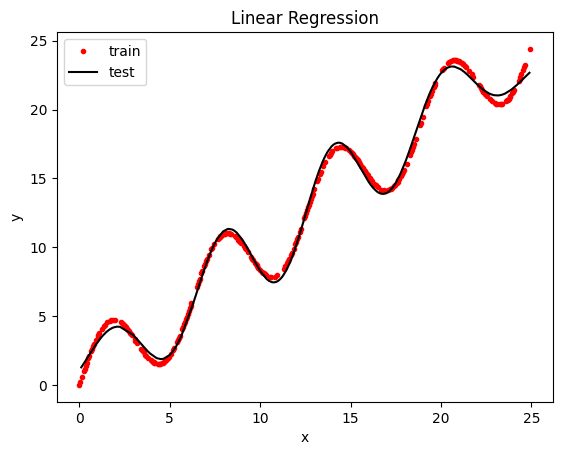

In [ ]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train, gaussian_basis, False)  # <------ 这里可以更改用的基函数, 是否使用梯度下降!

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()